In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir("C:\\Users\\Kate Muso\\Desktop")
churn=pd.read_csv('Churn_Modelling.csv')
churn



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
churn.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [3]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
churn.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)


In [5]:
churn.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


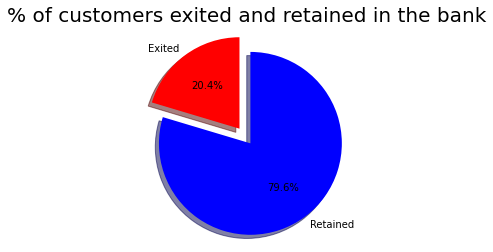

In [6]:
labels = ['Exited', 'Retained']
sizes = [churn.Exited[churn['Exited']==1].count(),churn.Exited[churn['Exited']==0].count()]
explode = [0.1,0]

# creat the pie chart to plot the Exited column
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90, radius=0.5,colors=['r','b'],)
plt.title("% of customers exited and retained in the bank", size =20)
plt.axis('equal')
plt.show()

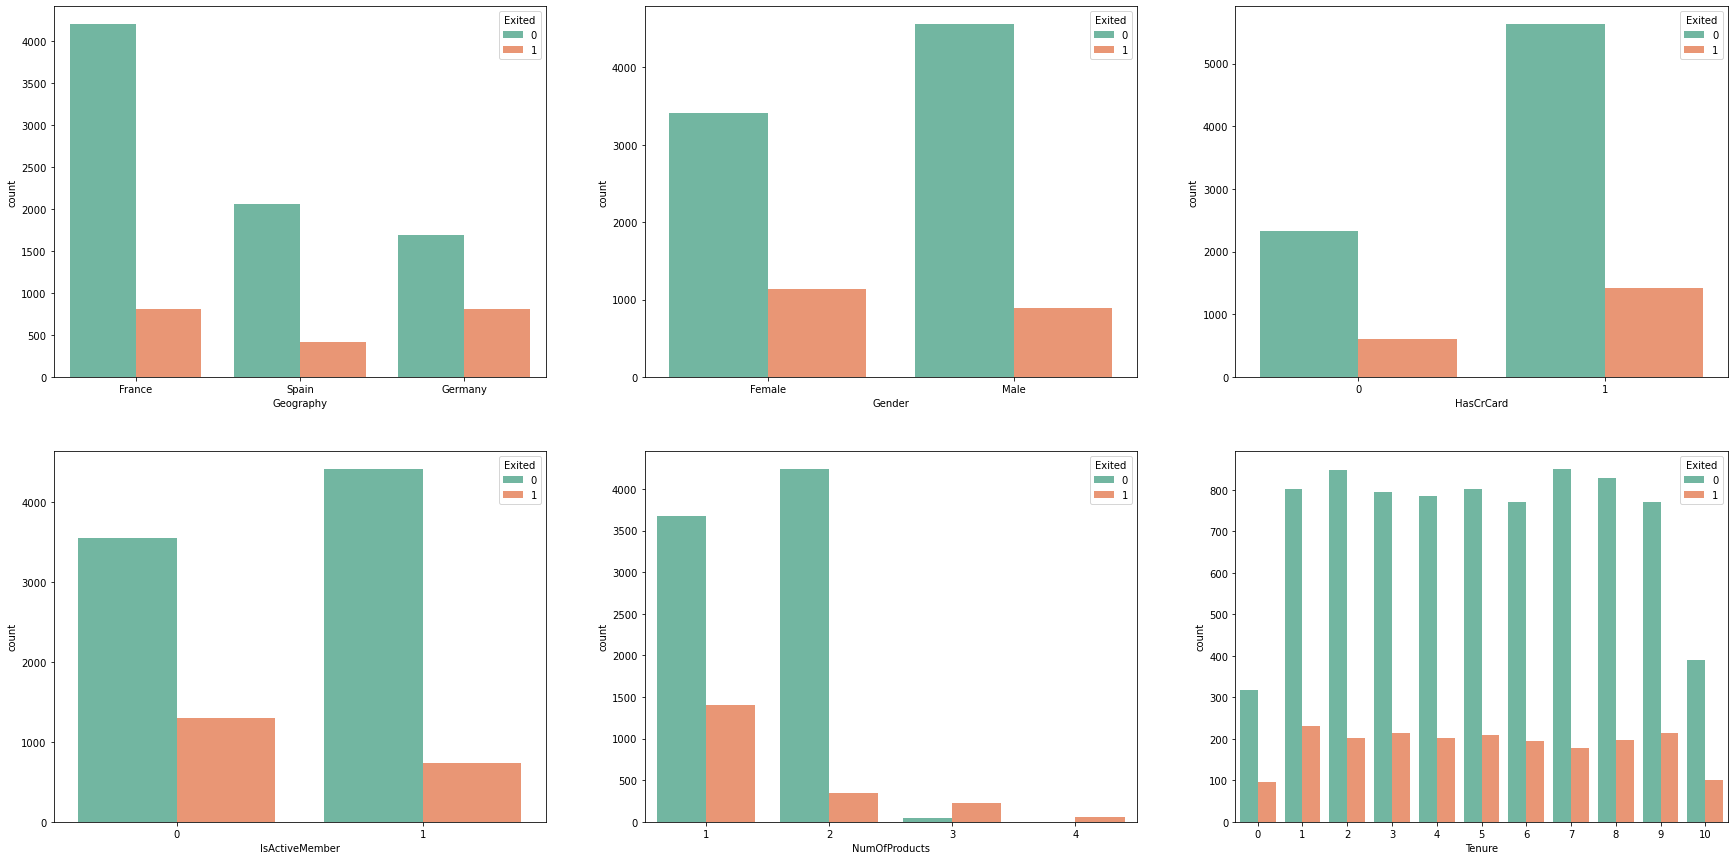

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))
sns.countplot(x='Geography', hue='Exited',data=churn,palette='Set2',ax=ax[0][0])
sns.countplot(x='Gender', hue='Exited',data=churn,palette='Set2',ax=ax[0][1])
sns.countplot(x='HasCrCard', hue='Exited',data=churn,palette='Set2',ax=ax[0][2])
sns.countplot(x='IsActiveMember', hue='Exited',data=churn,palette='Set2',ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited',data=churn,palette='Set2',ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited',data=churn,palette='Set2',ax=ax[1][2])
#sns.countplot(x='Age', hue='Exited',data=churn,palette='Set2',ax=ax[0][3])
#sns.countplot(x='Complain', hue='Exited',data=churn,palette='Set2',ax=ax[1][4])

plt.show()
     

In [8]:
churn.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
churn.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
     

In [11]:
churn_dummies = pd.get_dummies(churn)

In [12]:
churn_dummies.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
dtype: object

In [13]:
churn_dummies.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


In [14]:
# prompt: split the dataset in 70% training and 30% testing

# Split the dataset into training and testing sets
X = churn_dummies.drop('Exited', axis=1)
y = churn_dummies['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# prompt: Run a random forest model on the train set and evaluate with the test, then compute accuracy, precision, ROC and AUC metrics

rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)

# Compute accuracy, precision, ROC and AUC metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC AUC:", roc_auc)

Accuracy: 0.8676666666666667
Precision: 0.7619047619047619
ROC AUC: 0.7152856527261181


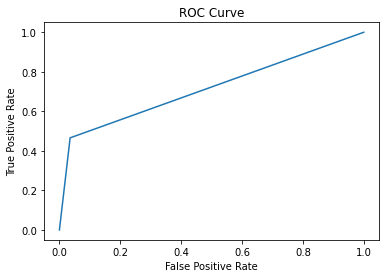

In [16]:
# prompt: Print the ROC curve for the model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate the false positive rate (fpr) and true positive rate (tpr) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [17]:
# prompt: Print the confusion matrix for the random forest model

cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2331   85]
 [ 312  272]]


Accuracy: 0.808
Precision: 0.506514657980456
ROC AUC: 0.7035601696452871


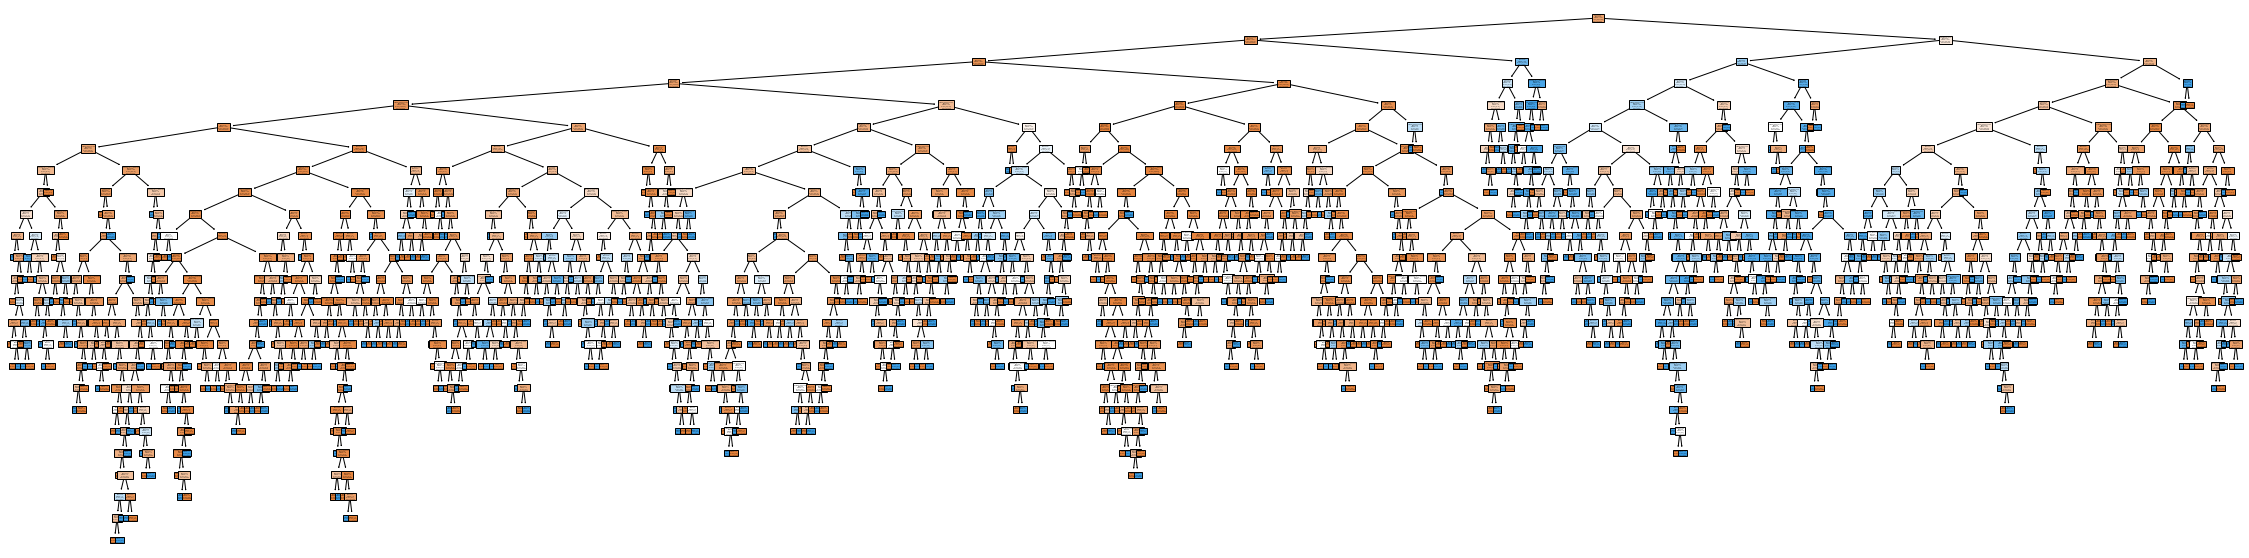

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred_dt = dt_model.predict(X_test)

# Compute accuracy, precision, ROC and AUC metrics
accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
precision_dt = metrics.precision_score(y_test, y_pred_dt)
roc_auc_dt = metrics.roc_auc_score(y_test, y_pred_dt)

# Print the results
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("ROC AUC:", roc_auc_dt)

# Plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(40,10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['Retained', 'Exited'], filled=True)
plt.show()


Random Forest Classifier:
Accuracy: 0.8676666666666667
Precision: 0.7619047619047619
ROC AUC: 0.7152856527261181

Decision Tree Classifier:
Accuracy: 0.808
Precision: 0.506514657980456
ROC AUC: 0.7035601696452871


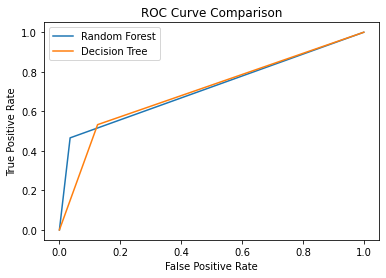

In [19]:
# prompt: Compare the performance of the random forest classifier with that of the decision tree classifier

import matplotlib.pyplot as plt
# Compare the accuracy, precision, and ROC AUC scores of the two models
print("Random Forest Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC AUC:", roc_auc)

print("\nDecision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("ROC AUC:", roc_auc_dt)

# Import the required module
from sklearn.metrics import roc_curve
# Calculate the false positive rate (fpr) and true positive rate (tpr) for the decision tree model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)

# Plot the ROC curves of the two models on the same graph
plt.plot(fpr, tpr, label='Random Forest')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

Accuracy: 0.8006666666666666
Precision: 0.43636363636363634
ROC AUC: 0.5282647645831442


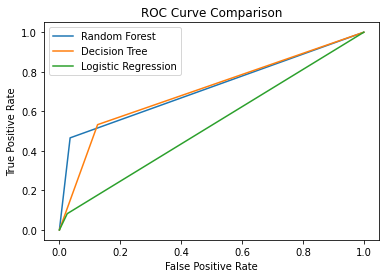

In [20]:
# prompt: Use the logistic regression to predict churn

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
lr_model = LogisticRegression(random_state=42)

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred_lr = lr_model.predict(X_test)

# Compute accuracy, precision, ROC and AUC metrics
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
precision_lr = metrics.precision_score(y_test, y_pred_lr)
roc_auc_lr = metrics.roc_auc_score(y_test, y_pred_lr)

# Print the results
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("ROC AUC:", roc_auc_lr)

# Calculate the false positive rate (fpr) and true positive rate (tpr) for the logistic regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)

# Plot the ROC curves of the three models on the same graph
plt.plot(fpr, tpr, label='Random Forest')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

Accuracy: 0.794
Precision: 0.36507936507936506
ROC AUC: 0.5228272702531072


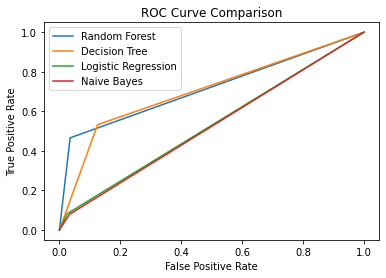

In [21]:
# prompt: Predict churn using Naive Bayes model and compare its performance

import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred_nb = nb_model.predict(X_test)

# Compute accuracy, precision, ROC and AUC metrics
accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)
precision_nb = metrics.precision_score(y_test, y_pred_nb)
roc_auc_nb = metrics.roc_auc_score(y_test, y_pred_nb)

# Print the results
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("ROC AUC:", roc_auc_nb)

# Calculate the false positive rate (fpr) and true positive rate (tpr) for the Naive Bayes model
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_nb)

# Plot the ROC curves of the four models on the same graph
plt.plot(fpr, tpr, label='Random Forest')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


Accuracy: 0.8006666666666666
Precision: 0.43636363636363634
ROC AUC: 0.5282647645831442


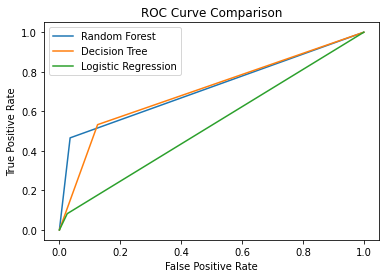

In [22]:
# prompt: Use the logistic regression to predict churn

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
lr_model = LogisticRegression(random_state=42)

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred_lr = lr_model.predict(X_test)

# Compute accuracy, precision, ROC and AUC metrics
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
precision_lr = metrics.precision_score(y_test, y_pred_lr)
roc_auc_lr = metrics.roc_auc_score(y_test, y_pred_lr)

# Print the results
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("ROC AUC:", roc_auc_lr)

# Calculate the false positive rate (fpr) and true positive rate (tpr) for the logistic regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)

# Plot the ROC curves of the three models on the same graph
plt.plot(fpr, tpr, label='Random Forest')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()